In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import scipy as sp # type: ignore
from scipy.optimize import curve_fit # type: ignore
import matplotlib.pyplot as plt # type: ignore

#Functional API
import tensorflow as tf # type: ignore
from tensorflow import keras # type: ignore
from keras.models import Model # type: ignore
import keras.optimizers # type: ignore
from keras.layers import Dense, Input # type: ignore

# UNITS
ev2au = 1/27.211396132
au2ev = 27.211396132
ang2au = 1/0.529177249
au2ang = 0.529177249
au2fs = 1/41.34137333656
fs2au = 41.34137333656
au2debye = 1/0.39343
debye2au = 0.39343
au2nm = 0.052917720859
nm2au = 1/0.052917720859
au2cm1 = 2.1947463137E5
cm12au = 1/(2.1947463137E5)
au2amu = 1/1822.88848325
amu2au = 1822.88848325
thz2au = 1.0/0.029979/au2cm1

2025-05-24 18:07:13.725036: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 18:07:13.990614: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 18:07:14.234969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748124434.449638    1894 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748124434.510066    1894 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#La suma debe ser una suma de 32 terminos

coeff_matrix = np.zeros((32,4))
coeff_matrix[0,:] = [0,0,1,32849.58]
coeff_matrix[1,:] = [0,1,1,-17553.99]
coeff_matrix[2,:] = [1,0,1,-27625.23]
coeff_matrix[3,:] = [2,0,0,50043.09]
coeff_matrix[4,:] = [4,0,0,336.49]
coeff_matrix[5,:] = [0,1,2,-3360.94]
coeff_matrix[6,:] = [0,3,0,-64.84]
coeff_matrix[7,:] = [1,1,1,18285.40]
coeff_matrix[8,:] = [2,0,1,-7181.44]
coeff_matrix[9,:] = [0,0,4,2553.25]
coeff_matrix[10,:] = [0,2,2,-4905.39]
coeff_matrix[11,:] = [0,4,0,3505.21]
coeff_matrix[12,:] = [1,1,2,-21845.86]
coeff_matrix[13,:] = [1,3,0,-1416.44]
coeff_matrix[14,:] = [2,1,1,5596.86]
coeff_matrix[15,:] = [3,0,1,-142.39]
coeff_matrix[16,:] = [0,0,2,15623.64]
coeff_matrix[17,:] = [0,2,0,72972.84]
coeff_matrix[18,:] = [1,1,0,9857.17]
coeff_matrix[19,:] = [3,0,0,-2376.30]
coeff_matrix[20,:] = [0,2,1,-8550.95]
coeff_matrix[21,:] = [1,0,2,-4597.25]
coeff_matrix[22,:] = [1,2,0,-657.28]
coeff_matrix[23,:] = [2,1,0,1985.36]
coeff_matrix[24,:] = [0,1,3,-5546.12]
coeff_matrix[25,:] = [0,3,1,-11098.50]
coeff_matrix[26,:] = [1,0,3,-9178.03]
coeff_matrix[27,:] = [1,2,1,948.74]
coeff_matrix[28,:] = [2,0,2,-983.04]
coeff_matrix[29,:] = [2,2,0,-584.78]
coeff_matrix[30,:] = [3,1,0,1694.77]
coeff_matrix[31,:] = [0,0,3,4971.79]

def V(R1,R2,theta):
    R1e = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
    R2e = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
    alpha_1 = 1.95/ang2au #Amstrong^-1
    alpha_2 = 2.34/ang2au #Amstrong^-1
    theta_e = np.pi #Degrees

    aR1 = -alpha_1*(R1-R1e)
    aR2 = -alpha_2*(R2-R2e)

    y_1 = 1.0 - np.exp(aR1)
    y_2 = 1.0 - np.exp(aR2)
    y_3 = np.cos(theta) - np.cos(theta_e)

    suma = 0.0
    for i in range(32):
        suma = suma + (coeff_matrix[i,3]*cm12au)*(y_1**int(coeff_matrix[i,0]))*(y_2**int(coeff_matrix[i,1]))*(y_3**(coeff_matrix[i,2]))
    return(suma)

Text(0.5, 1.0, 'Potenciales de energia de superficie')

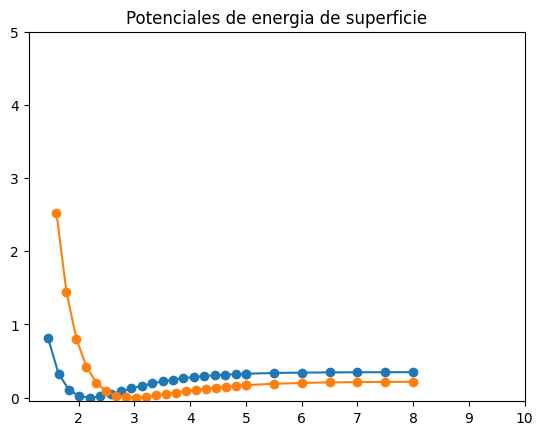

In [3]:
q1 = np.concatenate((np.linspace(1.45,5.0,20),np.linspace(5.0, 8, 7))) #Azul
q2 = np.concatenate((np.linspace(1.6,5.0,20),np.linspace(5.0, 8, 7))) #Naranja
R1_eq = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
R2_eq = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
theta_eq = np.pi
plt.plot(q1, V(R1_eq,q1,theta_eq), "o-")
plt.plot(q2, V(q2,R2_eq,theta_eq), "o-")
plt.axis([1.1,10,-0.05,5])
plt.title("Potenciales de energia de superficie")
#plt.show()

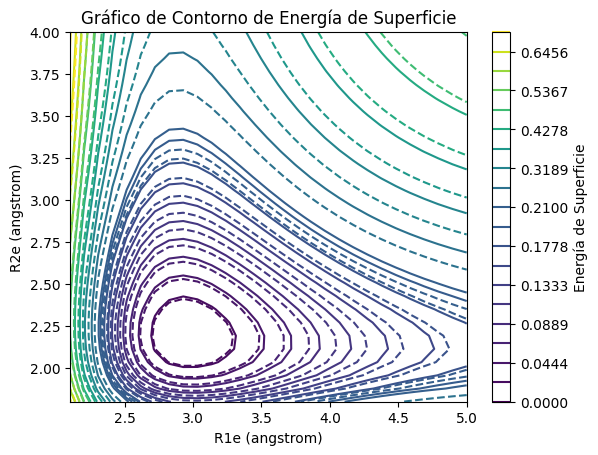

In [4]:
Ncontours = 20
R1e_values = np.linspace(2.1, 5, 29)
R2e_values = np.linspace(1.8, 4, 29) 

R1e, R2e = np.meshgrid(R1e_values, R2e_values)
energia_superficie = np.vectorize(V)(R1e, R2e, np.pi) #np.vectorize para aplicar la función a matrices
energia_superficie1 = 1.1*np.vectorize(V)(R1e, R2e, np.pi) #np.vectorize para aplicar la función a matrices
level_min = 0.0 
level_max = 0.7
levels0 = np.concatenate((np.linspace(level_min,0.2,Ncontours-10),np.linspace(0.21,level_max,10)))

#plt.contour(R1e, R2e, energia_superficie,30,vmin=0.0,vmax=0.7)
plt.contour(R1e, R2e, energia_superficie,levels0,vmin=level_min,vmax=level_max)
plt.contour(R1e, R2e, energia_superficie1,levels0,vmin=level_min,vmax=level_max,linestyles='dashed')
plt.colorbar(label='Energía de Superficie')

plt.xlabel('R1e (angstrom)')
plt.ylabel('R2e (angstrom)')
plt.title('Gráfico de Contorno de Energía de Superficie')
plt.show()

In [5]:
# Generacion del archivo de datos
data_set = np.zeros((len(q1)**2,3)) #Dim(729,3)
l = 0 #Inicializa en 0
for i in range(len(q1)): #R1
    for j in range(len(q2)): #R2
        data_set[l,:] = q1[i],q2[j],V(q1[i],q2[j],np.pi) #Obtenemos valores para R1, R2 y V(R1,R2)
        l = l + 1

df = pd.DataFrame(data_set)
df.to_csv('PotencialOCS_2.csv')
df.columns = ['R1','R2','V'] #Renombramos las columnas

In [6]:
inputsmodel = df.drop('V', axis=1)
target = df.iloc[:,-1]

In [7]:
#Creamos una funcion custom_loss incluyendo la perdida fisica de la pinn.
from scipy.optimize import curve_fit # type: ignore

def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0

xdata = np.concatenate((np.linspace(1.6,5.0,30),np.linspace(5.0, 8, 7))) #q2
morse_parameters = np.zeros((len(q1),5))

for i in range(len(q1)): #En este range cambio la forma de graficar
    ydata = V(q1[i],xdata,theta_eq) #Potencial segun xdata
    popt, pcov = curve_fit(morsepotential, xdata, ydata, p0=[3.49440974e-01,  1.22952512e+00, -1.73828756e-03    ,  2.18903764e+00]) #Se hace el fitting considerando un p0 inicial para el resto
    
    morse_parameters[i,0] = q1[i]
    morse_parameters[i,1:] = popt
    
    #plt.title("Fitting de curvas morse en parametros de q2")
    #plt.plot(xdata, morsepotential(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % 
    #tuple(popt)) #Ploteo todos los popt calculados segun el ciclo for
    
    dfMorse = pd.DataFrame(morse_parameters[:]) #Creo el dataset de los valores
    dfMorse.columns = ['q','D','alpha','E','Req']
    
dfaxu = pd.DataFrame(dfMorse.loc[dfMorse.index.repeat(27)].reset_index(drop=True))
dfFinal = pd.concat([df,dfaxu],axis=1)

In [8]:
fit_v = []

for i, row, in dfFinal.iterrows():
    R2 = row['R2']
    D = row['D']
    alpha = row['alpha']
    E = row['E']
    Req = row['Req']
    
    potential = morsepotential(R2,D,alpha,E,Req)
    fit_v.append(potential)
    
dfFinal['VFitting'] = fit_v

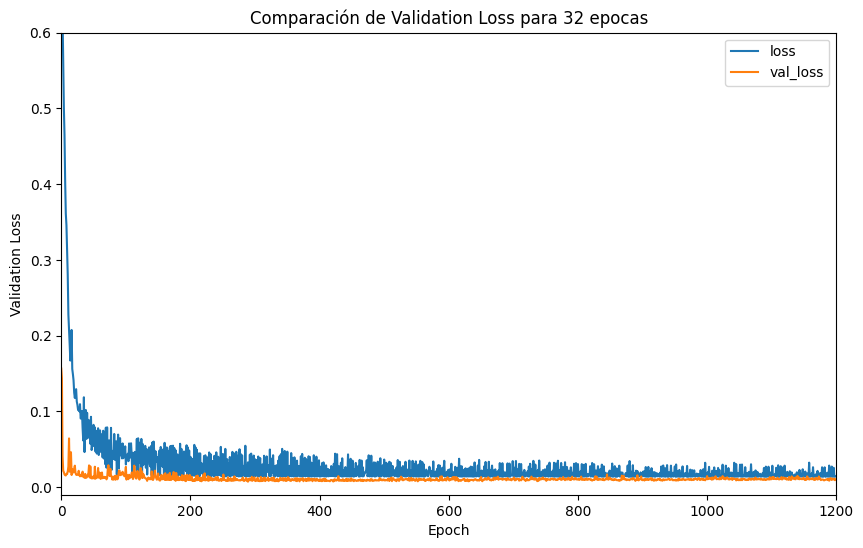

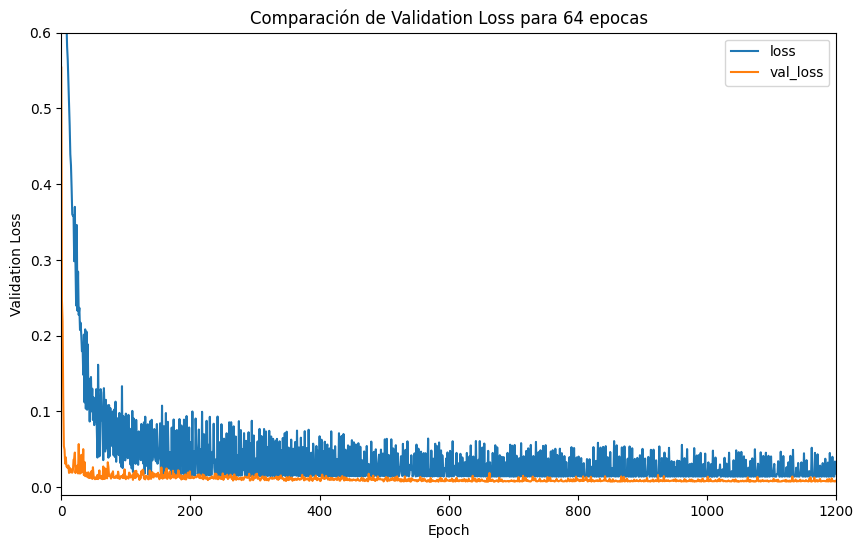

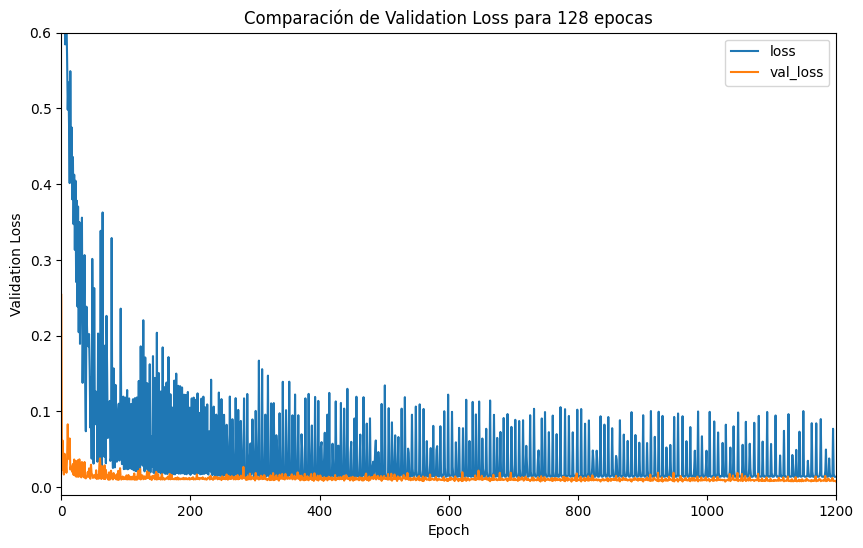

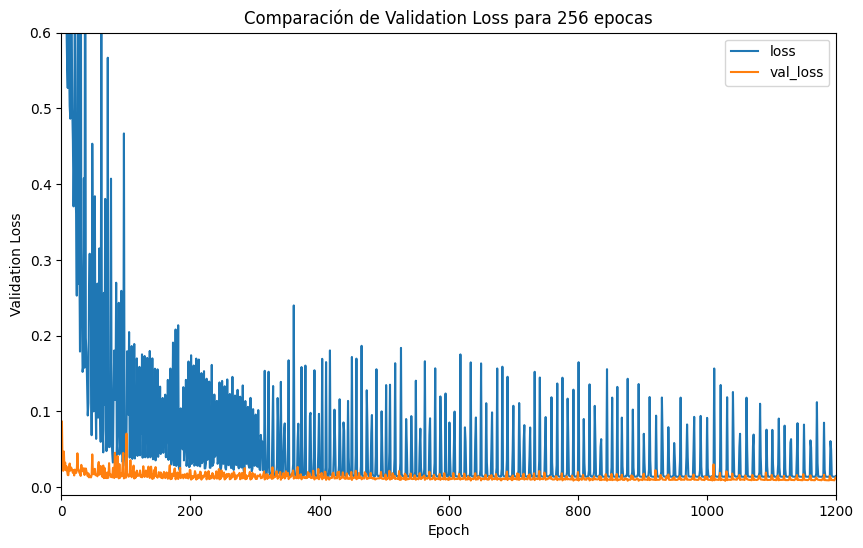

In [14]:
test32 = np.load('TrainRES_BS_0.001_EPs1200_VSplit0.2_BatchSz32.npy')
test64 = np.load('TrainRES_BS_0.001_EPs1200_VSplit0.2_BatchSz64.npy')
test128 = np.load('TrainRES_BS_0.001_EPs1200_VSplit0.2_BatchSz128.npy')
test256 = np.load('TrainRES_BS_0.001_EPs1200_VSplit0.2_BatchSz256.npy')

batch = [32, 64, 128, 256]
test = [test32, test64, test128, test256]

for i in range(len(batch)):
    plt.figure(figsize=(10,6))
    plt.plot(test[i][1,:], label=f'loss')
    plt.plot(test[i][0,:], label=f'val_loss')
    plt.axis([0, 1200, -0.01, 0.6])
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.title(f'Comparación de Validation Loss para {batch[i]} epocas')    
    plt.legend()
    plt.show()

In [10]:
def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0

r_values = np.linspace(1.5, 6.0, 729) #qvec
r_values_tf = tf.convert_to_tensor(r_values, dtype=tf.float32)


2025-05-24 18:07:24.255685: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


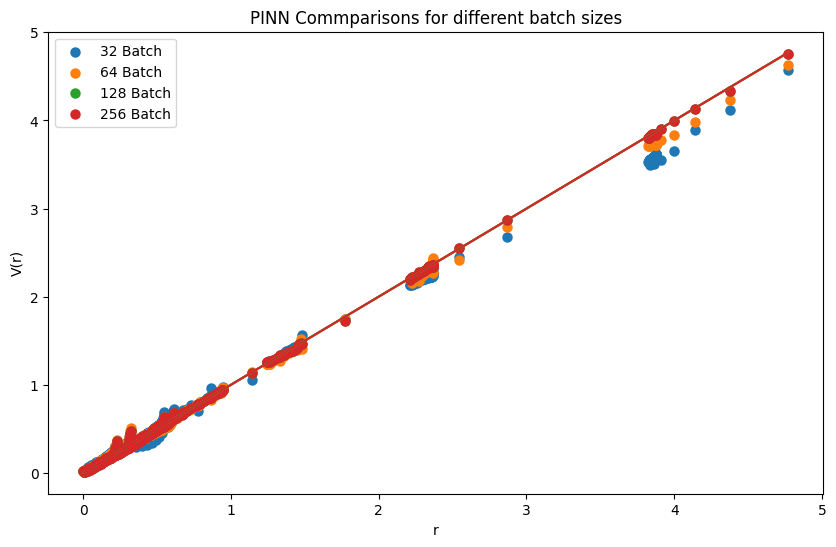

In [45]:
v32 = np.load('TrainPREDS_BS_0.001_EPs1200_VSplit0.2_BatchSz32.npy')
v64 = np.load('TrainPREDS_BS_0.001_EPs1200_VSplit0.2_BatchSz64.npy')
v128 = np.load('TrainPREDS_BS_0.001_EPs1200_VSplit0.2_BatchSz128.npy')
v256 = np.load('TrainPREDS_BS_0.001_EPs1200_VSplit0.2_BatchSz256.npy')
y_pred = [v32, v64, v128, v128, v256]

#Predicciones de cada BS
plt.figure(figsize=(10,6))
for i in range(len(batch)):
    plt.scatter(y_pred[i][0,:], y_pred[i][1,:], label=f'{batch[i]} Batch', linewidth=1.5)
    plt.plot(y_pred[i][0,:],y_pred[i][0,:])
    
plt.xlabel("r")
plt.ylabel("V(r)")
plt.title("PINN Commparisons for different batch sizes")
plt.legend()
plt.show()


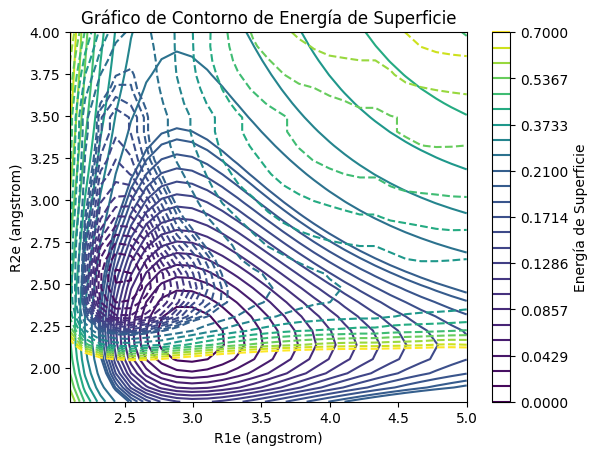

In [46]:
Ncontours = 25
R1e_values = np.linspace(2.1, 5, 27)
R2e_values = np.linspace(1.8, 4, 27) 

R1e, R2e = np.meshgrid(R1e_values, R2e_values)
energia_superficie = np.vectorize(V)(R1e, R2e, np.pi) 
energia_superficie1 =  y_pred[2][1,:].reshape(R1e.shape)

level_min = 0.0 
level_max = 0.7
levels0 = np.concatenate((np.linspace(level_min,0.2,Ncontours-10),np.linspace(0.21,level_max,10)))

#plt.contour(R1e, R2e, energia_superficie,30,vmin=0.0,vmax=0.7)
plt.contour(R1e, R2e, energia_superficie,levels0,vmin=level_min,vmax=level_max)
plt.contour(R1e, R2e, energia_superficie1,levels0,vmin=level_min,vmax=level_max,linestyles='dashed')
plt.colorbar(label='Energía de Superficie')

plt.xlabel('R1e (angstrom)')
plt.ylabel('R2e (angstrom)')
plt.title('Gráfico de Contorno de Energía de Superficie')
plt.show()

1. Graficar contorno
2. grados de libertad en las moleculas
3. Comparaciones para val loss segun los hyperparameters
4. estudiar val loss
5. bash (sed)